In [84]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
from models import make_model
import porepy as pp

# Barton-Bandis coefficient

In [85]:
solvers = [1, 2]
physics = [0]
barton_bandis = [0, 1, 2, 3]
friction = [1]

data = {}
names = {}
for i, [
    sol,
    bb,
    fr,
    ph,
] in enumerate(
    product(
        solvers,
        barton_bandis,
        friction,
        physics,
    )
):
    data[i] = load_data(f"../stats/stats_geo1x1_sol{sol}_ph{ph}_bb{bb}_fr{fr}.json")
    names[i] = f'Physics {ph} {"Richardson" if sol == 1 else "GMRES"} BB {bb} FR {fr}'


shape = [2, 4]
figsize = (15, 4)

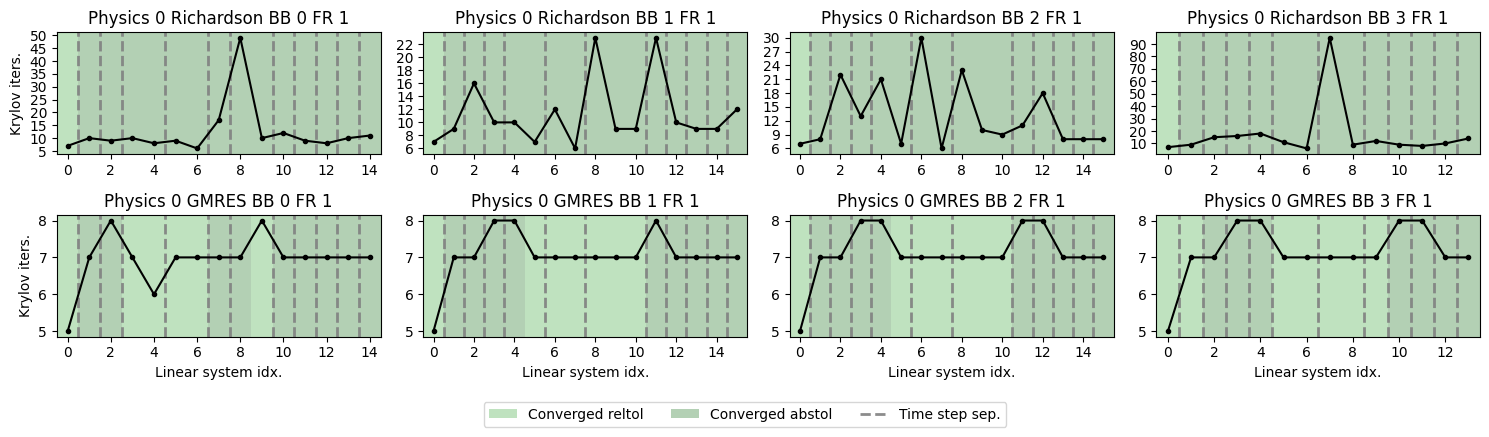

In [86]:
def render_element(entry: list[TimeStepStats]):
    color_converged_reason(entry)
    # color_sticking_sliding_open(entry)

    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

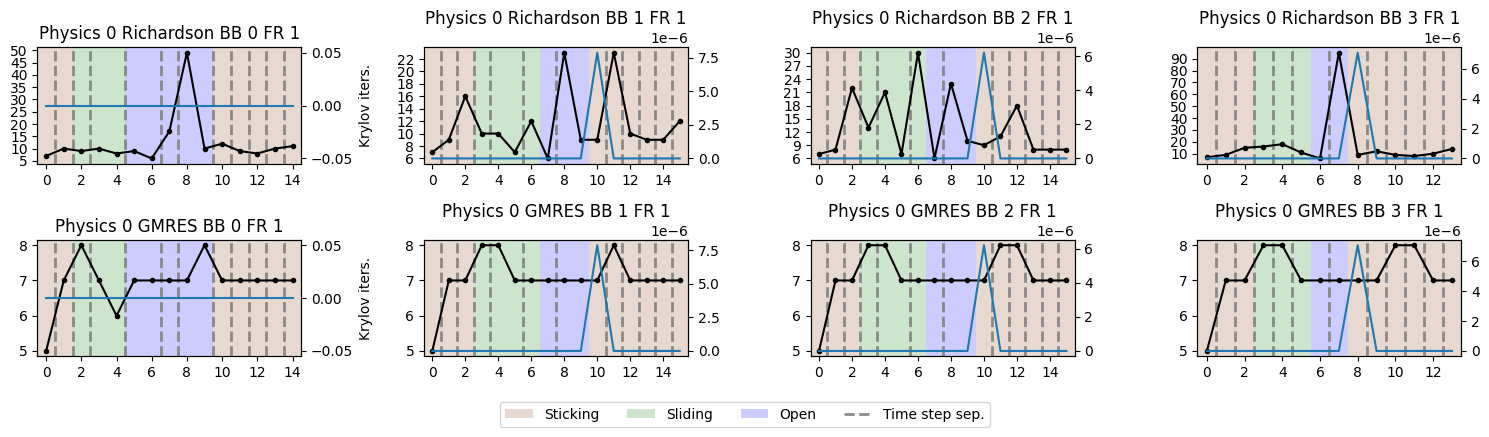

In [87]:
def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")

    coulomb_mismatch = [ls.coulomb_mismatch for ts in entry for ls in ts.linear_solves]
    sticking_ut = [ls.sticking_u_mismatch for ts in entry for ls in ts.linear_solves]
    lambdan_max = [ls.lambdan_max for ts in entry for ls in ts.linear_solves]
    lambdan_max[0] = 0
    lambdat_max = [ls.lambdat_max for ts in entry for ls in ts.linear_solves]
    ujumpn_max = [ls.un_max for ts in entry for ls in ts.linear_solves]
    ujumpt_max = [ls.ut_max for ts in entry for ls in ts.linear_solves]
    error = [ls.error_matrix_contribution for ts in entry for ls in ts.linear_solves]


    plt.gca().twinx()
    # plt.yscale('log')
    # plt.plot(coulomb_mismatch, label="Coulomb mismatch")  # interesting
    plt.plot(sticking_ut, label=r'Sticking $u_\tau$ mismatch')  # interesting
    # plt.plot(lambdan_max, label=r'$\lambda_n$ max')
    # plt.plot(lambdat_max, label=r'$\lambda_\tau$ max')
    # plt.plot(ujumpn_max, label=r"$u_n$ max")
    # plt.plot(ujumpt_max, label=r'$u_\tau$ max')
    # plt.plot(error, label="Coulomb mismatch")  # interesting
    # plt.ylim(bottom=1e-6)


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

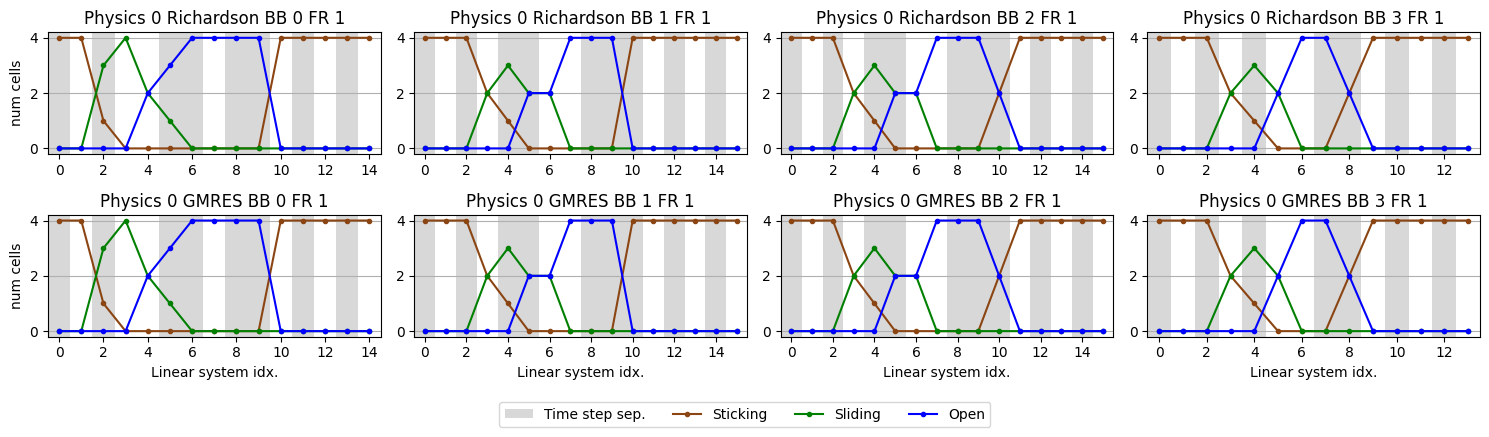

In [88]:
def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op = get_num_sticking_sliding_open(entry)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which="major", axis="y")
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(
    data,
    render_element,
    shape=shape,
    figsize=figsize,
    ylabel="num cells",
    ax_titles=names,
    #   ylabel="Fract. len., m"
)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

# Friction coef

In [89]:
solvers = [1, 2]
physics = [0]
barton_bandis = [2]
friction = [0, 1, 2]

data = {}
names = {}
for i, [
    sol,
    bb,
    fr,
    ph,
] in enumerate(
    product(
        solvers,
        barton_bandis,
        friction,
        physics,
    )
):
    data[i] = load_data(f"../stats/stats_geo1x1_sol{sol}_ph{ph}_bb{bb}_fr{fr}.json")
    names[i] = f'Physics {ph} {"Richardson" if sol == 1 else "GMRES"} BB {bb} FR {fr}'


shape = [2, 3]
figsize = (12, 4)

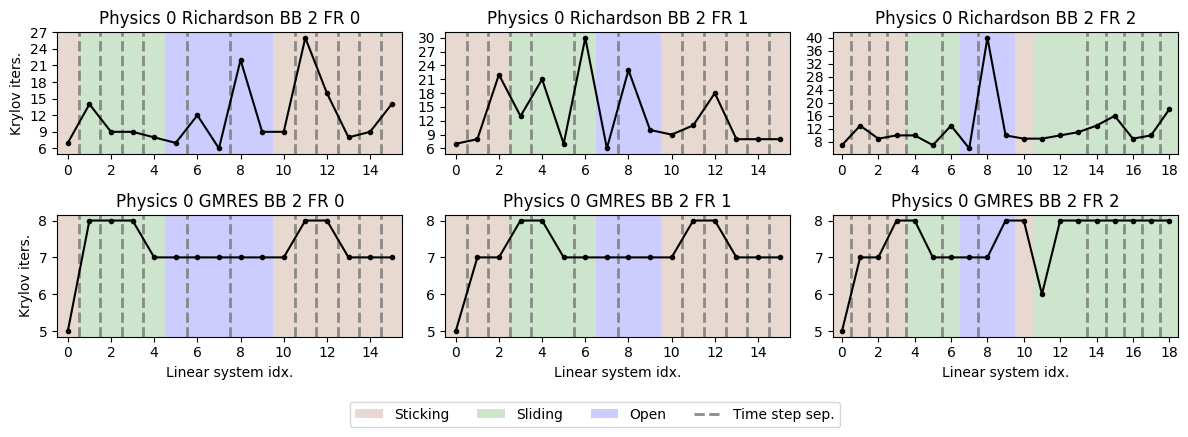

In [90]:
def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)

    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

Is this conditioning issue? 

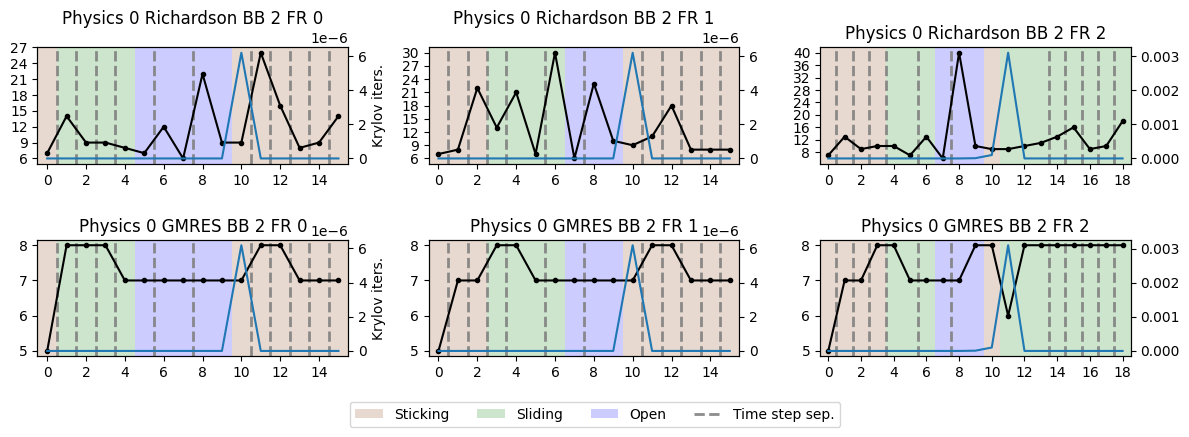

In [91]:
def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")

    coulomb_mismatch = [ls.coulomb_mismatch for ts in entry for ls in ts.linear_solves]
    sticking_ut = [ls.sticking_u_mismatch for ts in entry for ls in ts.linear_solves]
    lambdan_max = [ls.lambdan_max for ts in entry for ls in ts.linear_solves]
    lambdan_max[0] = 0
    lambdat_max = [ls.lambdat_max for ts in entry for ls in ts.linear_solves]
    ujumpn_max = [ls.un_max for ts in entry for ls in ts.linear_solves]
    ujumpt_max = [ls.ut_max for ts in entry for ls in ts.linear_solves]

    plt.gca().twinx()
    # plt.yscale('log')
    # plt.plot(coulomb_mismatch, label='Coulomb mismatch')  # interesting
    plt.plot(sticking_ut, label=r"Sticking $u_\tau$ mismatch")  # interesting
    # plt.plot(lambdan_max, label=r'$\lambda_n$ max')
    # plt.plot(lambdat_max, label=r'$\lambda_\tau$ max')
    # plt.plot(ujumpn_max, label=r"$u_n$ max")
    # plt.plot(ujumpt_max, label=r'$u_\tau$ max')
    # plt.ylim(bottom=1e-6)


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

# Num iterations table

In [92]:
import pandas as pd

barton_bandis = [0, 1, 2, 3]
friction = [0, 1, 2]

table = []
for fr in friction:
    table.append([])
    for bb in barton_bandis:
        entry = load_data(f"../stats/stats_geo1x1_sol{1}_ph{0}_bb{bb}_fr{fr}.json")
        num_gmres = get_gmres_iterations(entry)
        table[-1].append(round(np.mean(num_gmres)))

table = pd.DataFrame(
    table,
    index=["$F=0.1$", "$F=0.577$", "$F=0.8$"],
    columns=["BB off", "BB low", "BB medium", "BB high"],
)
table

,BB off,BB low,BB medium,BB high
$F=0.1$,10,14,12,15
$F=0.577$,12,11,13,17
$F=0.8$,11,12,12,19


# Grid refinement

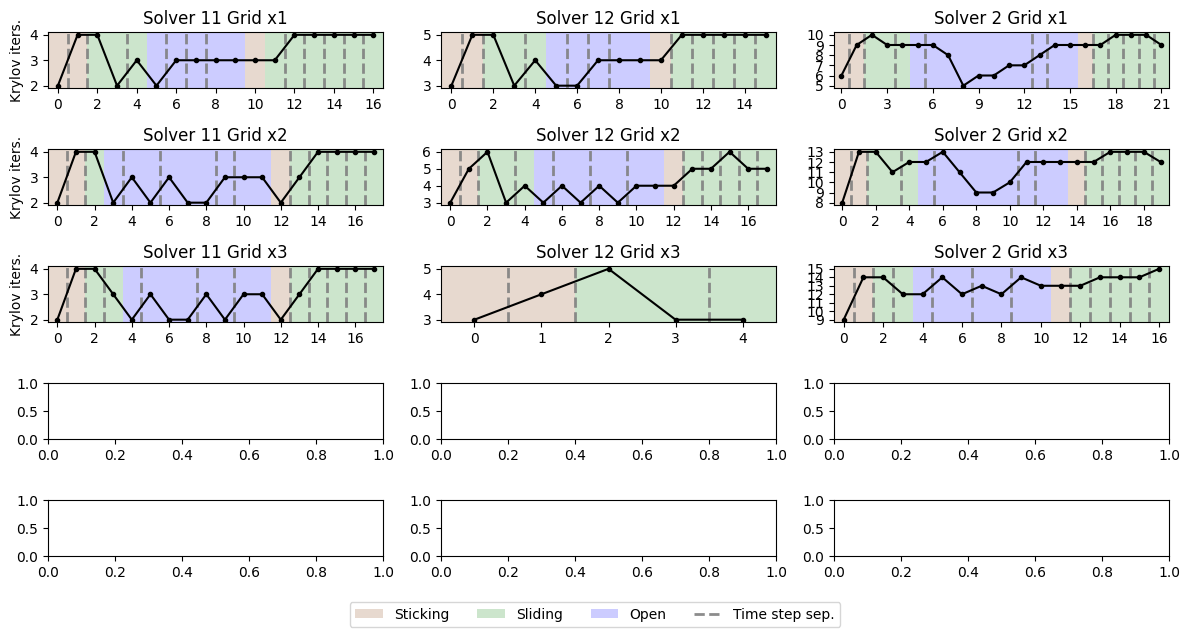

In [95]:
solvers = [11, 12, 2]
ph = 1
bb = 2
fr = 1
grid_refinement = [1, 2, 3]

data = {}
names = {}
for i, [g, sol] in enumerate(product(grid_refinement, solvers)):
    data[i] = load_data(f"../stats/stats_geo1x{g}_sol{sol}_ph{ph}_bb{bb}_fr{fr}.json")
    names[i] = f"Solver {sol} Grid x{g}"


shape = [5, 3]
figsize = (12, 6)


def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)

    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

In [97]:
from collections import defaultdict
import pandas as pd

table = defaultdict(lambda: [])

NDIGITS = 2

for g in grid_refinement:
    stats_name = f"stats_geo1x{g}_sol{2}_ph{1}_bb{2}_fr{1}.json"
    entry = load_data(f"../stats/{stats_name}")
    dofs_info = load_data(f"../stats/dofs_info_{stats_name}")
    total_dofs = (
        dofs_info["block 0"]
        + dofs_info["block 1"]
        + dofs_info["block 2"]
        + dofs_info["block 3"]
        + dofs_info["block 4"]
        + dofs_info["block 5"]
    )
    table["Refinement level"].append(f"x{g}")
    table["Total DoFs"].append(total_dofs)
    table["Avg. GMRES iter."].append(round(np.mean(get_gmres_iterations(entry))))
    table["Avg. GMRES iter. (only rotations + FS)"].append(
        round(
            np.mean(
                get_gmres_iterations(
                    load_data(f"../stats/stats_geo1x{g}_sol{11}_ph{1}_bb{2}_fr{1}.json")
                )
            ),
            NDIGITS
        )
    )
    table["Avg. GMRES iter. (direct intead of AMG)"].append(
        round(
            np.mean(
                get_gmres_iterations(
                    load_data(f"../stats/stats_geo1x{g}_sol{12}_ph{1}_bb{2}_fr{1}.json")
                )
            ),
            NDIGITS
        )
    )
    table['Avg. Newton iters.'].append(round(np.mean(get_newton_iterations(entry)), NDIGITS))

table = pd.DataFrame(table).T
table

,0,1,2
Refinement level,x1,x2,x3
Total DoFs,768,2964,6534
Avg. GMRES iter.,8,12,13
Avg. GMRES iter. (only rotations + FS),3.24,3.0,3.0
Avg. GMRES iter. (direct intead of AMG),4.19,4.22,3.38
Avg. Newton iters.,1.83,1.67,1.42


Reasons:
1. FS
2. Interfaces (rotation and fluid flow)
3. Mechanics amg is bad
4. Flow amg is bad

TODO: Refinement level with direct subsolvers (only FS)

TODO: Invert interface flow directly

TODO: Change setup to make the injection-production transition smoother